# 引入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成判别函数

In [6]:
def perception(W, w1, w2):
    flag = False
    while flag != True:
        for i in range(len(w1)):
            t1 = 0
            t2 = 0
            for j in range(len(W)):
                t1 += W[j] * w1[i][j]
                t2 += W[j] * w2[i][j]
            if(t1 <= 0):
                for j in range(len(W)):
                    W[j] += w1[i][j]
                flag = False
                break
            if(t2 >= 0):
                for j in range(len(W)):
                    W[j] -= w2[i][j]
                flag = False
                break
            flag = True
    print("判别函数：" + "d(x)= %d" % (W[0]) + "x" + "%d" % (W[1]) + "y" + "%d" % (W[2]) + "z+" + "%d" % (W[3]))
    return W

# 主函数

In [8]:
if __name__ == '__main__':
    W = [-1, -2, -2, 0]
    w1 = [[0, 0, 0, 1], [1, 0, 0, 1], [1, 0, 1, 1], [1, 1, 0, 1]]
    w2 = [[0, 0, 1, 1], [0, 1, 1, 1], [0, 1, 0, 1], [1, 1, 1, 1]]
    W = perception(W, w1, w2)


判别函数：d(x)= 3x-2y-3z+1


# 可视化处理

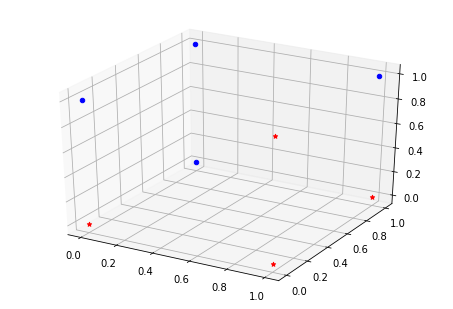

In [9]:
    fig = plt.figure()
    ax = Axes3D(fig)
    for i in range(len(w1)):
        ax.scatter(w1[i][0],w1[i][1],w1[i][2],c = 'r',marker='*')
        ax.scatter(w2[i][0],w2[i][1],w2[i][2],c = 'b',marker='o')
    plt.grid()
 
    xmin = min(min(w1[:][0]), min(w2[:][0]))
    xmax = max(max(w1[:][0]), max(w2[:][0]))
 
    ymin = min(min(w1[:][1]), min(w2[:][1]))
    ymax = max(max(w1[:][1]), max(w2[:][1]))
 
    x = np.linspace(xmin, xmax, 10)
    y = np.linspace(ymin, ymax, 10)
 
    x, y = np.meshgrid(x, y)
    z = []
    for i in range(len(x)):
        z.append(((W[0]*x[i] + W[1]*y[i] + W[3]) / (-W[2])))